In [135]:
import pandas as pd
import numpy as np
listings = pd.read_csv('data/cleansed_listings.csv')
neighbourhoods = pd.read_csv('data/neighbourhoods.csv')
#calendar = pd.read_csv('data/calendar.csv')

In [136]:
listings.dtypes
price_cat = []
for row in range(len(listings['price'])):
    if listings['price'][row]<= 50 and 0<=listings['price'][row]:
        price_cat.append('$0-50')
    elif listings['price'][row]<=100 and 50<listings['price'][row]:
        price_cat.append('$50-100')
    elif listings['price'][row]<=150 and 100<listings['price'][row]:
        price_cat.append('$100-150')
    elif listings['price'][row]<=200 and 150<listings['price'][row]:
        price_cat.append('$150-200')
    elif listings['price'][row]<=300 and 200<listings['price'][row]:
        price_cat.append('$200-300')
    elif listings['price'][row]<=500 and 300<listings['price'][row]:
        price_cat.append('$300-500')
    elif listings['price'][row]<=1000 and 500<listings['price'][row]:
        price_cat.append('$500-1000')
    elif listings['price'][row]<=4000 and 1000<listings['price'][row]:
        price_cat.append('$1000-4000')
#print(price_cat)



id                          int64
listing_url                object
name                       object
summary                    object
space                      object
description                object
neighborhood_overview      object
picture_url                object
street                     object
neighbourhood_cleansed     object
city                       object
latitude                  float64
longitude                 float64
property_type              object
room_type                  object
accommodates                int64
bathrooms                 float64
bedrooms                  float64
beds                      float64
price                     float64
instant_bookable           object
cancellation_policy        object
sum_of_nights             float64
1                         float64
2                         float64
3                         float64
4                         float64
5                         float64
6                         float64
7             

In [123]:
listings['price'] = price_cat
listings['price']

0        $50-100
1          $0-50
2          $0-50
3        $50-100
4        $50-100
5        $50-100
6        $50-100
7          $0-50
8        $50-100
9       $200-300
10       $50-100
11       $50-100
12         $0-50
13       $50-100
14      $150-200
15       $50-100
16      $200-300
17      $100-150
18       $50-100
19       $50-100
20       $50-100
21      $100-150
22      $100-150
23      $150-200
24       $50-100
25         $0-50
26         $0-50
27       $50-100
28       $50-100
29         $0-50
          ...   
4836     $50-100
4837    $200-300
4838     $50-100
4839     $50-100
4840     $50-100
4841     $50-100
4842    $100-150
4843     $50-100
4844    $200-300
4845       $0-50
4846       $0-50
4847    $150-200
4848    $200-300
4849    $150-200
4850     $50-100
4851    $100-150
4852    $300-500
4853     $50-100
4854    $200-300
4855     $50-100
4856       $0-50
4857    $200-300
4858    $150-200
4859    $100-150
4860     $50-100
4861     $50-100
4862    $100-150
4863    $100-1

In [124]:
obj = listings.select_dtypes(include=['object']).copy()
obj.head()

,listing_url,name,summary,space,description,neighborhood_overview,picture_url,street,neighbourhood_cleansed,city,property_type,room_type,price,instant_bookable,cancellation_policy
0,https://www.airbnb.com/rooms/20872145,Charming Boston Residential,Berber carpeting. The living room has two full...,It's on the second floor.,Berber carpeting. The living room has two full...,Roslindale is an amazing up and coming town in...,https://a0.muscache.com/im/pictures/3cf36714-5...,"Boston, MA, United States",Roslindale,Boston,Apartment,Private room,$50-100,t,moderate
1,https://www.airbnb.com/rooms/13937181,Guest Room in Cozy Home,"Guest room available in cozy, well-lit home on...",0,"Guest room available in cozy, well-lit home on...",0,https://a0.muscache.com/im/pictures/02f47ff6-c...,"Boston, MA, United States",Roslindale,Boston,House,Private room,$0-50,f,flexible
2,https://www.airbnb.com/rooms/3575220,The Artist room in beautiful villa.,"My home is a villa in one of the friendliest, ...",The room is spacious and private. The house is...,"My home is a villa in one of the friendliest, ...","This a nice multicultural, family neighborhood.",https://a0.muscache.com/im/pictures/45068406/a...,"Boston, MA, United States",Roslindale,Boston,House,Private room,$0-50,f,moderate
3,https://www.airbnb.com/rooms/17419858,Large Bedroom in WestRoxbury/Rozzie,Beautiful private room on a quiet street with ...,0,Beautiful private room on a quiet street with ...,Quiet quiet quiet it's close to everything yet...,https://a0.muscache.com/im/pictures/404ac642-9...,"Boston, MA, United States",Roslindale,Boston,Apartment,Private room,$50-100,t,strict
4,https://www.airbnb.com/rooms/18202496,Bright and peaceful room in Roslindale Village,This is a spacious private room in a beautiful...,Perfect for couples or friends excited for day...,This is a spacious private room in a beautiful...,This is a fantastic area. Despite being a coll...,https://a0.muscache.com/im/pictures/878e31ee-f...,"Boston, MA, United States",Roslindale,Boston,House,Private room,$50-100,f,flexible


In [125]:
# city, street: boston - Boston, change to cap, change to the same
# label encoding: neighborhood_cleansed, property, cancellation
# delete picture url, listing url, neiborhood_overview, description, space
# name: one-hot encoding?
obj["room_type"].value_counts()
obj["instant_bookable"].value_counts()
obj["city"].value_counts()
obj["price"].value_counts()

$50-100       1354
$100-150       976
$150-200       937
$200-300       704
$0-50          406
$300-500       352
$500-1000      126
$1000-4000      11
Name: price, dtype: int64

In [126]:
# room_type: Entire home/apt: 0, Private room: 1, Shared room: 2
# instant_bookable: f: 0, t: 1
cleanup_nums = {"room_type":{"Entire home/apt": 0, "Private room": 1,
                            "Shared room": 2},
               "instant_bookable": {"f": 0, "t": 1},
                "price":{"$0-50":0, "$50-100":1, "$100-150":2, "$150-200":3, "$200-300":4,
                         "$300-500":5, "$500-1000":6, "$1000-4000":7}}
obj.replace(cleanup_nums, inplace=True)
obj.dtypes

listing_url               object
name                      object
summary                   object
space                     object
description               object
neighborhood_overview     object
picture_url               object
street                    object
neighbourhood_cleansed    object
city                      object
property_type             object
room_type                  int64
price                      int64
instant_bookable           int64
cancellation_policy       object
dtype: object

In [127]:
obj["cancellation_policy"] = obj["cancellation_policy"].astype('category')
obj.dtypes
obj["cancellation_policy_cat"] = obj["cancellation_policy"].cat.codes
obj.dtypes

listing_url                  object
name                         object
summary                      object
space                        object
description                  object
neighborhood_overview        object
picture_url                  object
street                       object
neighbourhood_cleansed       object
city                         object
property_type                object
room_type                     int64
price                         int64
instant_bookable              int64
cancellation_policy        category
cancellation_policy_cat        int8
dtype: object

In [128]:
obj["neighbourhood_cleansed"] = obj["neighbourhood_cleansed"].astype('category')
obj.dtypes
obj["neighbourhood_cleansed_cat"] = obj["neighbourhood_cleansed"].cat.codes
obj.dtypes

listing_url                     object
name                            object
summary                         object
space                           object
description                     object
neighborhood_overview           object
picture_url                     object
street                          object
neighbourhood_cleansed        category
city                            object
property_type                   object
room_type                        int64
price                            int64
instant_bookable                 int64
cancellation_policy           category
cancellation_policy_cat           int8
neighbourhood_cleansed_cat        int8
dtype: object

In [129]:
obj["property_type"] = obj["property_type"].astype('category')
obj.dtypes
obj["property_type_cat"] = obj["property_type"].cat.codes
obj.dtypes

listing_url                     object
name                            object
summary                         object
space                           object
description                     object
neighborhood_overview           object
picture_url                     object
street                          object
neighbourhood_cleansed        category
city                            object
property_type                 category
room_type                        int64
price                            int64
instant_bookable                 int64
cancellation_policy           category
cancellation_policy_cat           int8
neighbourhood_cleansed_cat        int8
property_type_cat                 int8
dtype: object

In [130]:
listings['property_type'] = obj["property_type_cat"]
listings['neighbourhood_cleansed'] = obj["neighbourhood_cleansed_cat"]
listings['cancellation_policy'] = obj["cancellation_policy_cat"]
listings['room_type'] = obj["room_type"]
listings['instant_bookable'] = obj["instant_bookable"]
listings['price'] = obj["price"]

In [134]:
df = listings.drop(['city', 'listing_url', 'picture_url', 'neighborhood_overview', 
                    'summary','space', 'description', 'street', 'name'], axis = 1)
df.dtypes

id                          int64
listing_url                object
name                       object
summary                    object
space                      object
description                object
neighborhood_overview      object
picture_url                object
street                     object
neighbourhood_cleansed       int8
city                       object
latitude                  float64
longitude                 float64
property_type                int8
room_type                   int64
accommodates                int64
bathrooms                 float64
bedrooms                  float64
beds                      float64
price                       int64
instant_bookable            int64
cancellation_policy          int8
sum_of_nights             float64
1                         float64
2                         float64
3                         float64
4                         float64
5                         float64
6                         float64
7             

In [132]:
X = df.drop(['price','id','latitude','longitude'], axis = 1).values
y = df['price'].values
X.shape
y.shape

(4866,)

Feature ranking:
1. feature neighbourhood_cleansed (0.100441)
2. feature property_type (0.082790)
3. feature room_type (0.062740)
4. feature accommodates (0.061216)
5. feature bathrooms (0.058964)
6. feature bedrooms (0.058198)
7. feature beds (0.057601)
8. feature instant_bookable (0.050960)
9. feature cancellation_policy (0.050903)
10. feature sum_of_nights (0.042848)
11. feature 1 (0.038240)
12. feature 2 (0.036036)
13. feature 3 (0.035520)
14. feature 4 (0.035405)
15. feature 5 (0.034813)
16. feature 6 (0.034438)
17. feature 7 (0.034239)
18. feature 8 (0.034094)
19. feature 9 (0.033742)
20. feature 10 (0.032662)
21. feature 11 (0.024153)


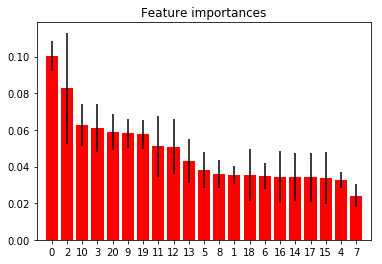

In [133]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
# print(importances)
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

col_header = list(df.columns.values)
col_header.remove('id')
col_header.remove('price')
col_header.remove('latitude')
col_header.remove('longitude')

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, col_header[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [116]:
X = df.drop(['price','id','instant_bookable','cancellation_policy','sum_of_nights',
            '1','2','3','4','5','6','7','8','9','10','11','12'], axis = 1).values

In [117]:
df_1hot = df.copy()
X_dummies = pd.get_dummies(df_1hot, columns=df_1hot.columns, drop_first=True) #one hot encoding
X_dummies

,id_5506,id_6695,id_6976,id_8792,id_9273,id_9765,id_9824,id_9855,id_9857,id_9858,...,11_833.0,11_892.333333333,11_900.0,11_999.0,11_1000.0,11_1146.66666667,11_1316.66666667,11_1400.0,11_2000.0,11_2952.6
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, random_state=0)

In [120]:
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor
#rf = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=0)
#rf.fit(X_train, y_train)
# from sklearn.ensemble import RandomForestClassifier
# clf = RandomForestClassifier(max_depth=12, random_state=5)
# clf.fit(X_train, y_train)
# # ypred = clf.predict_proba(X_test)
# scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
# print(scores)
# print(scores.mean())

adab = AdaBoostClassifier(n_estimators=30, random_state=7)
adab.fit(X_train, y_train)
scores = cross_val_score(adab, X_train, y_train, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

/Users/yiwenshen/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:553: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


[ 0.89701897  0.89130435  0.89645777  0.81643836  0.74725275  0.74725275
  0.74725275  0.67768595  0.67768595  0.8480663 ]
0.794641588077
